In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

<ipython-input-2-1c502f52aa32>:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
train = pd.read_csv("/Users/user/Desktop/EliteBook 2020/datasasaR/Data_Competitions/Stock_Price_Prediction/Train_awoL0xl.csv")

In [4]:
test = pd.read_csv("/Users/user/Desktop/EliteBook 2020/datasasaR/Data_Competitions/Stock_Price_Prediction/Test_QQKW4dv.csv")

In [5]:
train.head()

,ID,stock,Date,Open,High,Low,Close,holiday,unpredictability_score
0,id_0,0,2017-01-03,82.9961,82.7396,82.9144,82.8101,1,7
1,id_1,0,2017-01-04,83.1312,83.1669,83.3779,82.9690,0,7
2,id_2,0,2017-01-05,82.6622,82.7634,82.8984,82.8578,0,7
3,id_3,0,2017-01-06,83.0279,82.7950,82.8425,82.7385,0,7
4,id_4,0,2017-01-09,82.3761,82.0828,82.1473,81.8641,0,7


In [7]:
test.head()

,ID,stock,Date,holiday,unpredictability_score
0,id_713,0,2019-11-01,0,7
1,id_714,0,2019-11-04,0,7
2,id_715,0,2019-11-05,0,7
3,id_716,0,2019-11-06,0,7
4,id_717,0,2019-11-07,0,7


In [ ]:
# Changing the ID and Close column names

In [11]:
ID_COL, TARGET_COL = 'ID', 'Close'

In [12]:
# Exploring the datashape of the dataset and clearly marking out which are the features for the dataset
# Features exploration
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 73439 samples and 9 variables

Test contains 4223 samples and 5 variables

The dataset contains 7 features


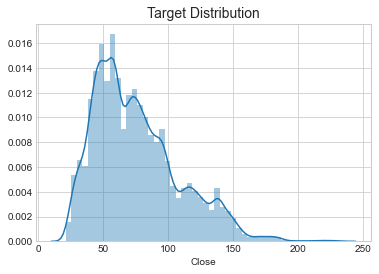

In [14]:
#Analyzing the distribution of the target 
#Since it is numerical, I will use the distribution graph
# The graph is used to specify the probability of the variable falling within a particular range of values
target_dist = sns.distplot(train[TARGET_COL])
target_dist = plt.title("Target Distribution", fontsize=14)

In [16]:
#A brief summary of the data at hand
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73439 entries, 0 to 73438
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      73439 non-null  object 
 1   stock                   73439 non-null  int64  
 2   Date                    73439 non-null  object 
 3   Open                    73439 non-null  float64
 4   High                    73439 non-null  float64
 5   Low                     73439 non-null  float64
 6   Close                   73439 non-null  float64
 7   holiday                 73439 non-null  int64  
 8   unpredictability_score  73439 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 5.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      4223 non

In [17]:
#Percentage of null values in each variable
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

unpredictability_score    0.0
holiday                   0.0
Close                     0.0
Low                       0.0
High                      0.0
Open                      0.0
Date                      0.0
stock                     0.0
ID                        0.0
dtype: float64

In [18]:
#Finding unique values for each variable
train.nunique()

ID                        73439
stock                     103  
Date                      713  
Open                      60702
High                      60594
Low                       61015
Close                     60352
holiday                   2    
unpredictability_score    10   
dtype: int64

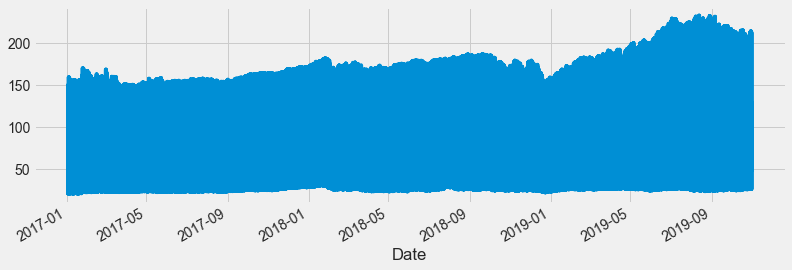

In [19]:
#TimeSeries Plots
plt.style.use('fivethirtyeight')
train['Date'] = pd.to_datetime(train['Date'])
time_graph = train.set_index('Date')['Close'].plot(figsize=(12, 4))

In [23]:
train.Date

0       2017-01-03
1       2017-01-04
2       2017-01-05
3       2017-01-06
4       2017-01-09
           ...    
73434   2019-10-25
73435   2019-10-28
73436   2019-10-29
73437   2019-10-30
73438   2019-10-31
Name: Date, Length: 73439, dtype: datetime64[ns]